<a href="https://colab.research.google.com/github/Ayushkumarxx/basic_ml_project/blob/main/house_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [22]:
def create_sample_data():
    """Create a sample house dataset for demonstration"""
    np.random.seed(42)
    n_samples = 1000

    # Generate synthetic house data
    data = {
        'size_sqft': np.random.normal(2000, 500, n_samples),
        'bedrooms': np.random.randint(1, 6, n_samples),
        'bathrooms': np.random.randint(1, 4, n_samples),
        'age_years': np.random.randint(0, 50, n_samples),
        'garage': np.random.randint(0, 3, n_samples),
        'location_score': np.random.randint(1, 11, n_samples)  # 1-10 rating
    }

    df = pd.DataFrame(data)

    # Create realistic price based on features
    df['price'] = (
        df['size_sqft'] * 150 +
        df['bedrooms'] * 10000 +
        df['bathrooms'] * 15000 +
        (50 - df['age_years']) * 1000 +
        df['garage'] * 8000 +
        df['location_score'] * 20000 +
        np.random.normal(0, 25000, n_samples)  # Add some noise
    )

    # Ensure positive prices
    df['price'] = np.abs(df['price'])

    return df

In [23]:
print("🏠 House Price Prediction Project")
print("=" * 40)

🏠 House Price Prediction Project


In [24]:
df = create_sample_data()

# For real datasets, use:
# df = pd.read_csv('your_dataset.csv')
# Dataset suggestions:
# 1. Boston Housing: https://www.kaggle.com/c/boston-housing
# 2. House Prices: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
# 3. California Housing: Built into scikit-learn

In [25]:
print("\n📊 Dataset Overview:")
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target: {df.columns[-1]}")

print("\n📈 First 5 rows:")
print(df.head())

print("\n📋 Dataset Info:")
print(df.info())

print("\n📊 Statistical Summary:")
print(df.describe())



📊 Dataset Overview:
Dataset shape: (1000, 7)
Features: ['size_sqft', 'bedrooms', 'bathrooms', 'age_years', 'garage', 'location_score']
Target: price

📈 First 5 rows:
     size_sqft  bedrooms  bathrooms  age_years  garage  location_score  \
0  2248.357077         4          3         32       1               1   
1  1930.867849         1          3         49       2               3   
2  2323.844269         3          1         37       1               4   
3  2761.514928         5          3         26       1               8   
4  1882.923313         3          3         33       0               6   

           price  
0  472586.178958  
1  397723.240973  
2  535803.297538  
3  716889.499268  
4  486030.437681  

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size_sqft       1000 non-null   float64
 1   bedrooms    

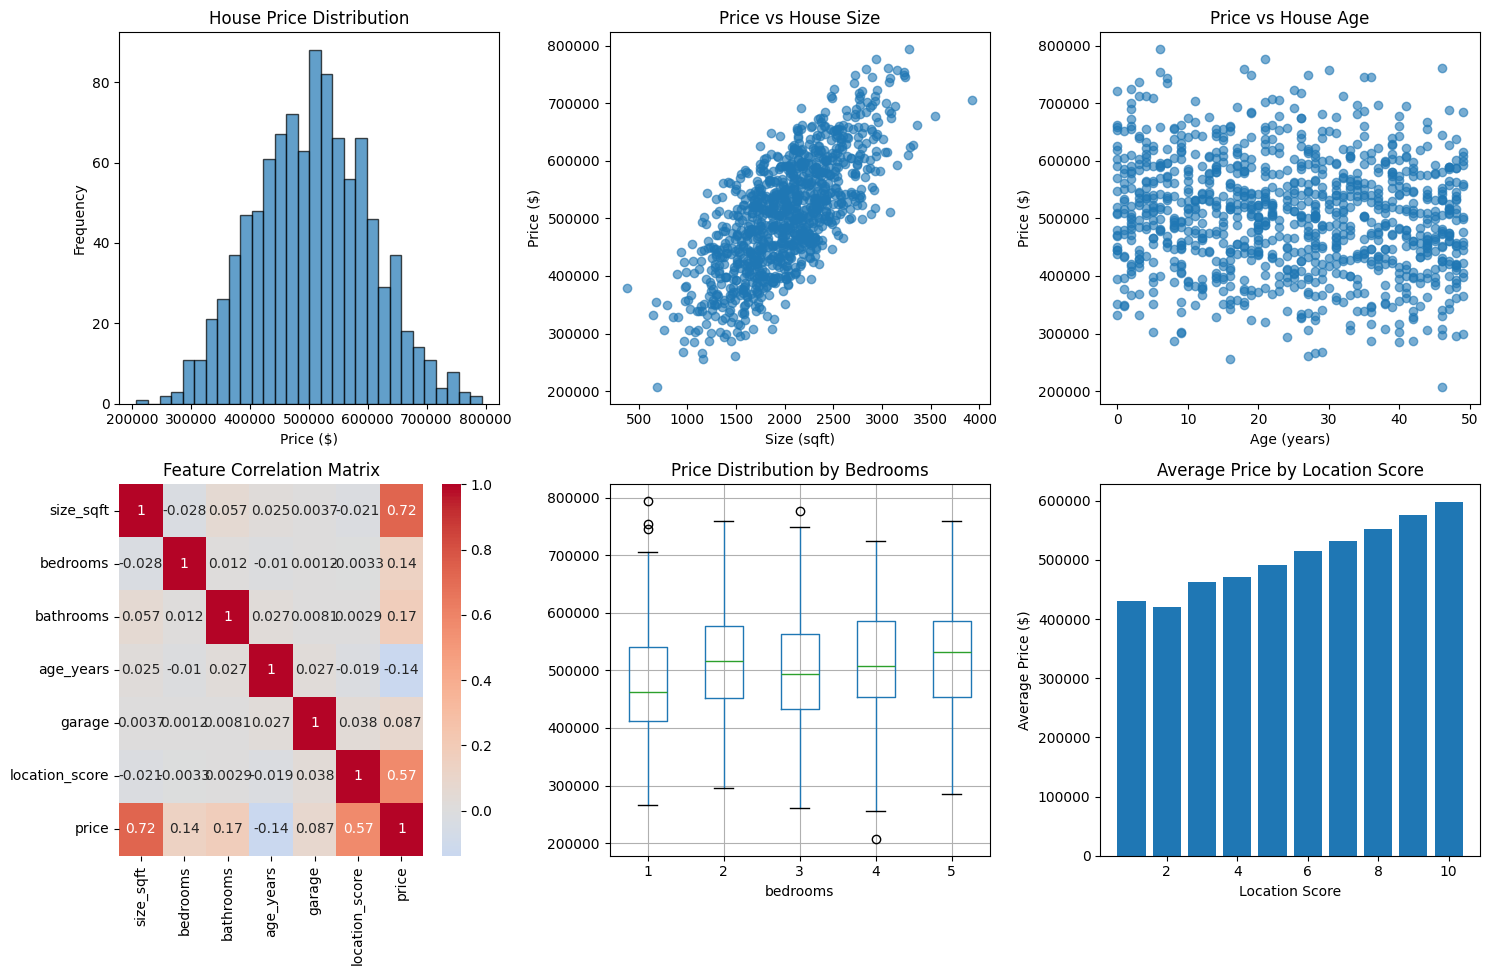

In [26]:
plt.figure(figsize=(15, 10))

# Price distribution
plt.subplot(2, 3, 1)
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('House Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Price vs Size
plt.subplot(2, 3, 2)
plt.scatter(df['size_sqft'], df['price'], alpha=0.6)
plt.title('Price vs House Size')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')

# Price vs Age
plt.subplot(2, 3, 3)
plt.scatter(df['age_years'], df['price'], alpha=0.6)
plt.title('Price vs House Age')
plt.xlabel('Age (years)')
plt.ylabel('Price ($)')

# Correlation heatmap
plt.subplot(2, 3, 4)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

# Price by bedrooms
plt.subplot(2, 3, 5)
df.boxplot(column='price', by='bedrooms', ax=plt.gca())
plt.title('Price Distribution by Bedrooms')
plt.suptitle('')  # Remove automatic title

# Price by location score
plt.subplot(2, 3, 6)
avg_price_by_location = df.groupby('location_score')['price'].mean()
plt.bar(avg_price_by_location.index, avg_price_by_location.values)
plt.title('Average Price by Location Score')
plt.xlabel('Location Score')
plt.ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

In [27]:
print("\n🔧 Data Preprocessing:")

# Check for missing values
print(f"Missing values: {df.isnull().sum().sum()}")

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature scaling (optional but often helpful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🔧 Data Preprocessing:
Missing values: 0
Features shape: (1000, 6)
Target shape: (1000,)
Training set size: 800
Testing set size: 200


In [28]:
print("\n🤖 Training Machine Learning Models:")

# Model 1: Linear Regression
print("\n1. Linear Regression:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Model 2: Random Forest
print("2. Random Forest:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)



🤖 Training Machine Learning Models:

1. Linear Regression:
2. Random Forest:


In [29]:
def evaluate_model(y_true, y_pred, model_name):
    """Evaluate model performance"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"  Mean Squared Error: ${mse:,.2f}")
    print(f"  Root Mean Squared Error: ${rmse:,.2f}")
    print(f"  Mean Absolute Error: ${mae:,.2f}")
    print(f"  R² Score: {r2:.4f}")

    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

print("\n📊 Model Evaluation Results:")
lr_metrics = evaluate_model(y_test, lr_predictions, "Linear Regression")
rf_metrics = evaluate_model(y_test, rf_predictions, "Random Forest")


📊 Model Evaluation Results:

Linear Regression Performance:
  Mean Squared Error: $662,242,981.18
  Root Mean Squared Error: $25,734.08
  Mean Absolute Error: $20,364.41
  R² Score: 0.9227

Random Forest Performance:
  Mean Squared Error: $947,019,035.96
  Root Mean Squared Error: $30,773.67
  Mean Absolute Error: $24,222.59
  R² Score: 0.8895


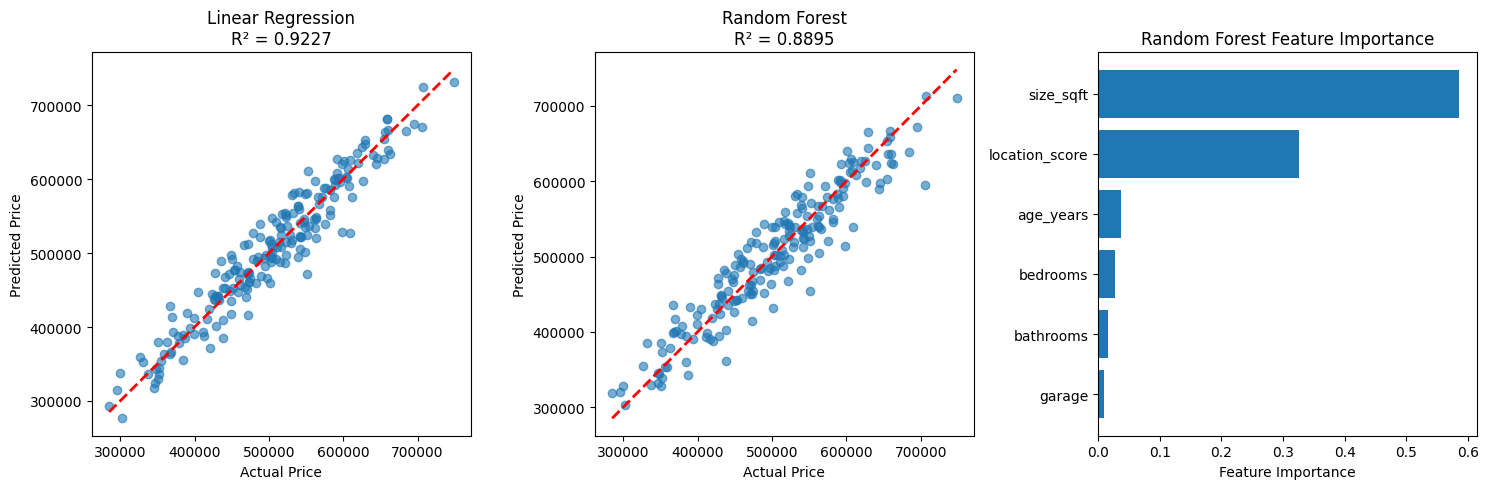

In [30]:
plt.figure(figsize=(15, 5))

# Linear Regression Results
plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Linear Regression\nR² = {lr_metrics["R2"]:.4f}')

# Random Forest Results
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Random Forest\nR² = {rf_metrics["R2"]:.4f}')

# Feature Importance (Random Forest)
plt.subplot(1, 3, 3)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()

In [31]:
print("\n🔮 Making Predictions on New Houses:")

# Example new houses
new_houses = pd.DataFrame({
    'size_sqft': [1800, 2500, 1200],
    'bedrooms': [3, 4, 2],
    'bathrooms': [2, 3, 1],
    'age_years': [5, 15, 25],
    'garage': [2, 2, 1],
    'location_score': [8, 9, 6]
})

# Make predictions
lr_new_predictions = lr_model.predict(new_houses)
rf_new_predictions = rf_model.predict(new_houses)

print("\nNew House Predictions:")
for i in range(len(new_houses)):
    print(f"\nHouse {i+1}:")
    print(f"  Features: {new_houses.iloc[i].to_dict()}")
    print(f"  Linear Regression Prediction: ${lr_new_predictions[i]:,.2f}")
    print(f"  Random Forest Prediction: ${rf_new_predictions[i]:,.2f}")


🔮 Making Predictions on New Houses:

New House Predictions:

House 1:
  Features: {'size_sqft': 1800, 'bedrooms': 3, 'bathrooms': 2, 'age_years': 5, 'garage': 2, 'location_score': 8}
  Linear Regression Prediction: $550,935.26
  Random Forest Prediction: $530,837.53

House 2:
  Features: {'size_sqft': 2500, 'bedrooms': 4, 'bathrooms': 3, 'age_years': 15, 'garage': 2, 'location_score': 9}
  Linear Regression Prediction: $691,091.79
  Random Forest Prediction: $662,384.42

House 3:
  Features: {'size_sqft': 1200, 'bedrooms': 2, 'bathrooms': 1, 'age_years': 25, 'garage': 1, 'location_score': 6}
  Linear Regression Prediction: $368,328.41
  Random Forest Prediction: $384,493.92


In [32]:
print("\n💡 Key Insights:")
print("1. Feature Importance (Random Forest):")
for feature, importance in zip(feature_importance['feature'], feature_importance['importance']):
    print(f"   {feature}: {importance:.4f}")

print(f"\n2. Best performing model: {'Random Forest' if rf_metrics['R2'] > lr_metrics['R2'] else 'Linear Regression'}")

print("\n3. Model Interpretation:")
print("   - Higher R² score indicates better model performance")
print("   - RMSE shows average prediction error in dollars")
print("   - Feature importance helps understand what drives house prices")

print("\n🎯 Next Steps for Improvement:")
print("1. Collect more diverse features (location, school ratings, crime rates)")
print("2. Try advanced models (XGBoost, Neural Networks)")
print("3. Perform feature engineering (create new features)")
print("4. Handle outliers and missing data more carefully")
print("5. Use cross-validation for more robust evaluation")


💡 Key Insights:
1. Feature Importance (Random Forest):
   garage: 0.0090
   bathrooms: 0.0161
   bedrooms: 0.0274
   age_years: 0.0369
   location_score: 0.3255
   size_sqft: 0.5850

2. Best performing model: Linear Regression

3. Model Interpretation:
   - Higher R² score indicates better model performance
   - RMSE shows average prediction error in dollars
   - Feature importance helps understand what drives house prices

🎯 Next Steps for Improvement:
1. Collect more diverse features (location, school ratings, crime rates)
2. Try advanced models (XGBoost, Neural Networks)
3. Perform feature engineering (create new features)
4. Handle outliers and missing data more carefully
5. Use cross-validation for more robust evaluation
